In [1]:
# notebooks/03_Evaluation_Interpretation.ipynb

In [2]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import sys
import os
import logging
from joblib import load
import matplotlib.pyplot as plt # Ensure plots show
sys.path.append(os.path.abspath(".."))

from src import config
from src.data_processing import fetch_and_prepare_data # Needed for X_train for SHAP
from src.evaluate import evaluate_model

logger = logging.getLogger(__name__)
logger.info("Notebook 03: Evaluation & Interpretation Started")

2025-04-23 23:17:30,787 - INFO - 2645888654 - Notebook 03: Evaluation & Interpretation Started


In [3]:
# Cell 2: Load Data and Trained Pipeline
model_type_to_evaluate = "logistic_regression" # Must match the trained model
pipeline_path = config.MODEL_OUTPUT_DIR / f"{model_type_to_evaluate}_pipeline.joblib"

try:
    # Load data (need X_train for SHAP)
    X_train, X_test, y_train, y_test = fetch_and_prepare_data()
    logger.info("Data loaded for evaluation.")

    # Load the pipeline
    trained_pipeline = load(pipeline_path)
    logger.info(f"Loaded trained pipeline from: {pipeline_path}")
    print("Loaded Pipeline:", trained_pipeline)

except FileNotFoundError:
    logger.error(f"Pipeline file not found: {pipeline_path}. Run training notebook first.", exc_info=True)
    raise SystemExit("Model pipeline not found.")
except Exception as e:
    logger.error(f"Failed to load data or pipeline: {e}", exc_info=True)
    raise SystemExit("Loading failed.")

2025-04-23 23:17:32,825 - INFO - data_processing - Fetching dataset ID: 45
2025-04-23 23:17:35,461 - INFO - data_processing - Dataset fetched.
2025-04-23 23:17:35,479 - INFO - data_processing - Raw data saved to C:\Users\CCLeyton\bio-ml-jupyter\data\heart_disease_raw.csv
2025-04-23 23:17:35,492 - INFO - data_processing - Created binary target column 'target'. Distribution:
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64
2025-04-23 23:17:35,501 - WARNING - data_processing - Missing values detected BEFORE split:
ca      4
thal    2
dtype: int64
2025-04-23 23:17:35,505 - INFO - data_processing - Splitting data (test ratio=0.2, random_state=42)
2025-04-23 23:17:35,520 - INFO - data_processing - Split complete. Train shape: (242, 13), Test shape: (61, 13)
2025-04-23 23:17:35,523 - INFO - 2386870479 - Data loaded for evaluation.
2025-04-23 23:17:35,531 - INFO - 2386870479 - Loaded trained pipeline from: C:\Users\CCLeyton\bio-ml-jupyter\models\logistic_regression_pipeline.

Loaded Pipeline: Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])


2025-04-23 23:17:40,341 - INFO - evaluate - Starting model evaluation...
2025-04-23 23:17:40,380 - INFO - evaluate - Evaluation Metrics:
accuracy     0.868852
precision    0.812500
recall       0.928571
f1_score     0.866667
roc_auc      0.950216
dtype: float64
2025-04-23 23:17:40,402 - INFO - evaluate - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

2025-04-23 23:17:41,149 - INFO - evaluate - Plot saved to C:\Users\CCLeyton\bio-ml-jupyter\logs\logistic_regression_confusion_matrix.png


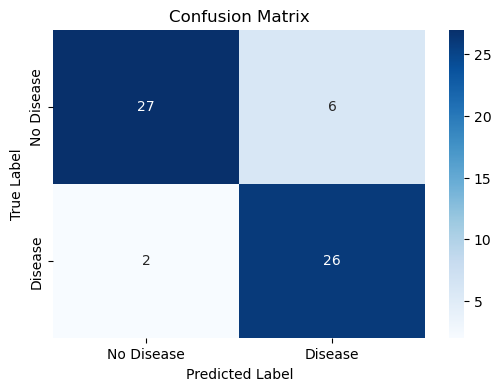

2025-04-23 23:17:41,852 - INFO - evaluate - Plot saved to C:\Users\CCLeyton\bio-ml-jupyter\logs\logistic_regression_roc_curve.png


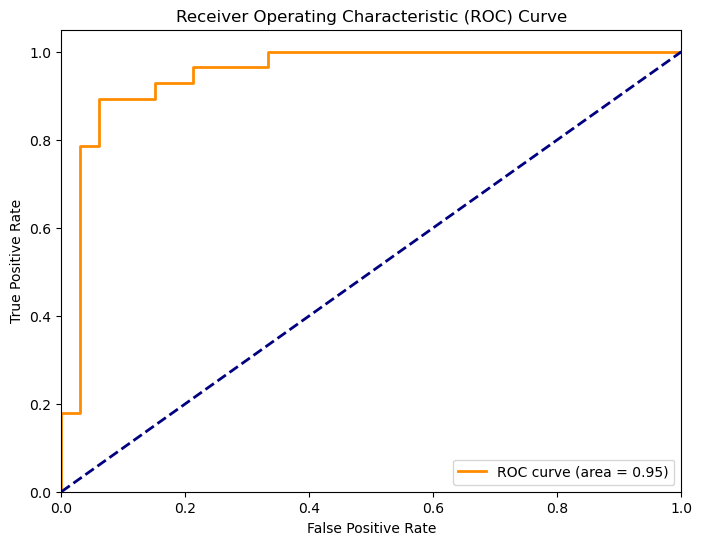

2025-04-23 23:17:42,207 - INFO - evaluate - Generating SHAP explanations...
2025-04-23 23:17:42,744 - INFO - evaluate - Plot saved to C:\Users\CCLeyton\bio-ml-jupyter\logs\logistic_regression_shap_summary_bar.png


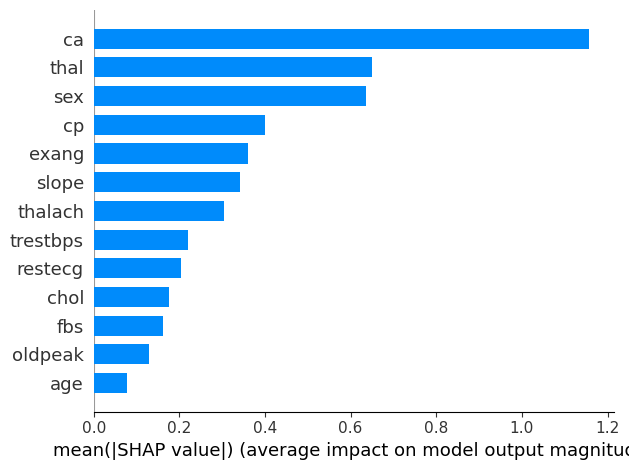

2025-04-23 23:17:44,030 - INFO - evaluate - Plot saved to C:\Users\CCLeyton\bio-ml-jupyter\logs\logistic_regression_shap_summary_dot.png


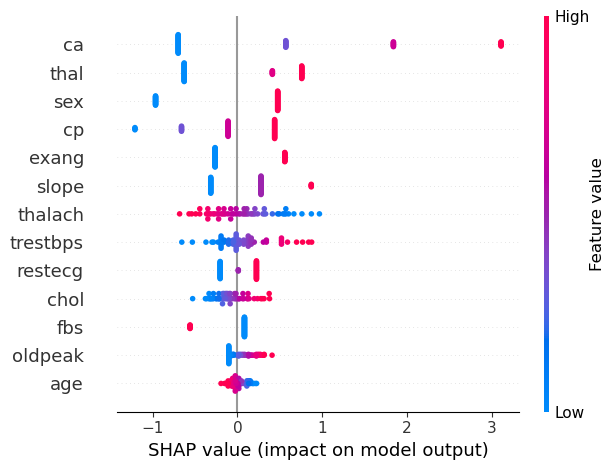

2025-04-23 23:17:45,441 - INFO - evaluate - Plot saved to C:\Users\CCLeyton\bio-ml-jupyter\logs\logistic_regression_shap_dependence_ca.png
2025-04-23 23:17:45,444 - INFO - evaluate - SHAP plots generated and saved.
2025-04-23 23:17:45,446 - INFO - 4188609191 - Evaluation complete.



--- Evaluation Metrics ---
accuracy     0.868852
precision    0.812500
recall       0.928571
f1_score     0.866667
roc_auc      0.950216
dtype: float64


In [4]:
# Cell 3: Evaluate Model and Generate Plots/SHAP
# The function handles calculations, plotting (inline), saving plots, and SHAP
try:
    metrics = evaluate_model(
        pipeline=trained_pipeline,
        X_test=X_test,
        y_test=y_test,
        X_train=X_train, # Pass X_train for SHAP
        plot_prefix=model_type_to_evaluate # Prefix for saved plot filenames
    )
    logger.info("Evaluation complete.")
    print("\n--- Evaluation Metrics ---")
    print(pd.Series(metrics))
except Exception as e:
    logger.error(f"Evaluation failed: {e}", exc_info=True)